In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\Imran\\Desktop\\diabetes.csv")

In [3]:
df.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,0.743719,0.590164,0.353535,0.0,0.500745,0.234415,50.0,1.0,B
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.427136,0.540984,0.292929,0.0,0.396423,0.116567,31.0,0.0,C
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

Number_pregnant          768
Glucose_concentration    768
Blood_pressure           768
Triceps                  768
Insulin                  768
BMI                      768
Pedigree                 768
Age                      768
Class                    768
Group                    768
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

Number_pregnant          0
Glucose_concentration    0
Blood_pressure           0
Triceps                  0
Insulin                  0
BMI                      0
Pedigree                 0
Age                      0
Class                    0
Group                    0
dtype: int64

In [7]:
df.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
1,6.0,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50.0,1.0,B
3,1.0,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31.0,0.0,C
5,8.0,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32.0,1.0,B
7,1.0,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21.0,0.0,B
9,0.0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33.0,1.0,C


In [8]:
df.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [9]:
df.shape

(768, 10)

In [10]:
#Normilzation of columns
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [11]:
df[cols_to_norm]=df[cols_to_norm].apply(lambda x: (x - x.min())/(x.max()-x.min()))

In [12]:
df.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
1,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50.0,1.0,B
3,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31.0,0.0,C
5,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32.0,1.0,B
7,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21.0,0.0,B
9,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33.0,1.0,C


In [13]:
import tensorflow as tf

In [14]:
df.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [15]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin=tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [16]:
#assigned group
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [17]:
assigned_group

VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [18]:
import matplotlib.pyplot as plt

In C:\Users\Imran\Anaconda3\anacond\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Imran\Anaconda3\anacond\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Imran\Anaconda3\anacond\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Imran\Anaconda3\anacond\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Imran\Anaconda3\anacond\lib\site-packages\matplo

<AxesSubplot:>

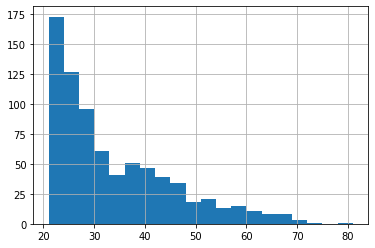

In [19]:
df['Age'].hist(bins=20)

In [20]:
age_bucket=tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [21]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, age, age_bucket]

In [22]:
#Train Test Split
x= df.drop('Class',axis=1)
x.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
1,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50.0,B
3,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31.0,C
5,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32.0,B
7,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21.0,B
9,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33.0,C


In [23]:
y = df['Class']
y.head()

1    1.0
3    0.0
5    1.0
7    0.0
9    1.0
Name: Class, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
training_x,test_x,training_y,test_y = train_test_split(x,y,test_size=0.3,random_state=0)

In [26]:
training_x

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
1161,0.000000,0.758794,0.737705,0.464646,0.000000,0.627422,0.125107,21.0,A
837,0.058824,0.417085,0.557377,0.000000,0.000000,0.271237,0.233134,27.0,A
1529,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,27.0,A
727,0.235294,0.733668,0.639344,0.000000,0.000000,0.573770,0.188728,67.0,A
1515,0.000000,0.618090,0.590164,0.000000,0.000000,0.540984,0.076857,52.0,B
...,...,...,...,...,...,...,...,...,...
1527,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,63.0,B
385,0.411765,0.798995,0.540984,0.000000,0.000000,0.453055,0.130231,36.0,C
1259,0.235294,0.472362,0.532787,0.222222,0.000000,0.368107,0.029889,21.0,B
1119,0.647059,0.427136,0.606557,0.000000,0.000000,0.448584,0.094791,35.0,B


In [27]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=training_x,y=training_y, batch_size=10,num_epochs=1000,shuffle=True)

In [28]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Imran\\AppData\\Local\\Temp\\tmpu82zu041', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000029A95BE4EC8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [29]:
model.train(input_fn=input_func, steps=1000)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
Ins

In [30]:
#Evalution the model
eval_input_func=tf.compat.v1.estimator.inputs.pandas_input_fn(x=test_x,y=test_y,batch_size=10,num_epochs=1,shuffle=True)

In [31]:
results=model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-27T13:22:25Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Imran\AppData\Local\Temp\tmpu82zu041\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-08-27-13:22:40
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74458873, accuracy_baseline =

In [32]:
results

{'accuracy': 0.74458873,
 'accuracy_baseline': 0.6796537,
 'auc': 0.7517215,
 'auc_precision_recall': 0.6185179,
 'average_loss': 0.53977805,
 'label/mean': 0.32034633,
 'loss': 0.57196873,
 'precision': 0.62711865,
 'prediction/mean': 0.3538149,
 'recall': 0.5,
 'global_step': 1000}

In [33]:
pred_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=test_x,batch_size=10,num_epochs=1,shuffle=True)

In [34]:
predictions = model.predict(pred_input_func)

In [35]:
predictions

<generator object Estimator.predict at 0x0000029A9778AF48>

In [36]:
my_pred = list(predictions)
my_pred

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Imran\AppData\Local\Temp\tmpu82zu041\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-0.53927696], dtype=float32),
  'logistic': array([0.3683558], dtype=float32),
  'probabilities': array([0.6316442 , 0.36835575], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.940124], dtype=float32),
  'logistic': array([0.28087533], dtype=float32),
  'probabilities': array([0.7191247, 0.2808753], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.5364747], dtype=float32),
  'logistic': array([0.36900806], dtype=float32),
  'probabilities': array([0.630992, 0.369008], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'lo